In [50]:
import pandas as pd
from numpy.f2py.f2py2e import numpy_version
from pymongo import MongoClient
from matplotlib import pyplot as plt
import seaborn as sb
import warnings
import math

warnings.filterwarnings(action="ignore")

required libraries are brought

In [51]:
client = MongoClient("mongodb://localhost:27017/")
db = client["PhishingClassifierProject"]
collection = db["raw_dataset"]

dataset connection has been established

In [52]:
records = collection.find()
df = pd.DataFrame(data=records)
df.drop(columns=["_id"], inplace=True)
df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,1,-1,-1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,0,-1,1,0,1,0
5845,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,0,-1,1,0,1,1
5846,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,0,-1,1,0,1,1
5847,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,-1,1,1,-1,1,1,1,0


raw dataset has been conceived

In [53]:
x = df.drop(columns=["Result"], inplace=False)
y = df["Result"]

 data has been separated into predictors and response

In [54]:
y.value_counts()

Result
0    3019
1    2830
Name: count, dtype: int64

reasonably balanced dataset between 0 and 1. No need for class balancing

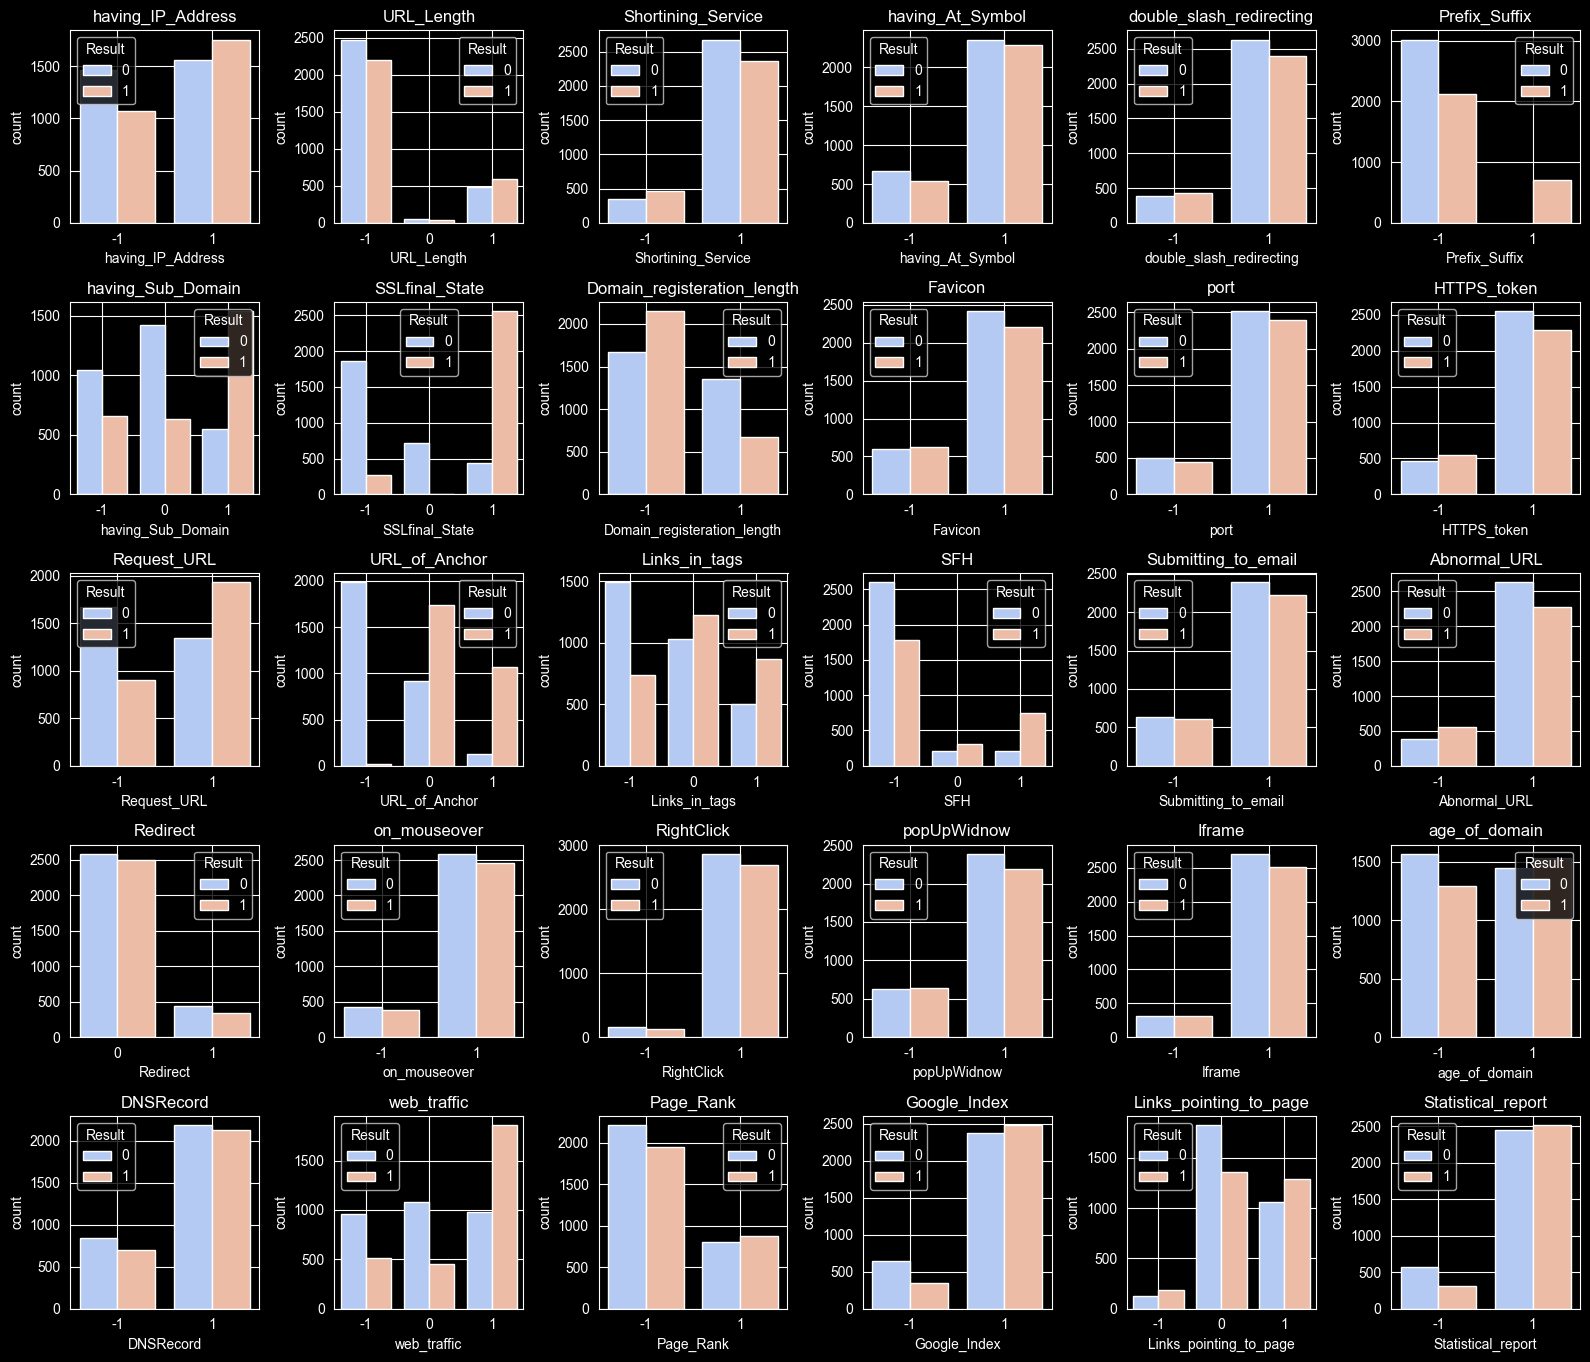

In [55]:
columns = x.columns
size = columns.size
lines = math.ceil(math.sqrt(size))

plt.figure(figsize=(16, 16))
for index, col in zip(range(1, size+1), columns):
    plt.subplot(lines, lines, index)
    sb.countplot(data=x, x=col, hue=y, palette="coolwarm")
    plt.title(col)
    plt.grid(True)
plt.tight_layout()
plt.show()

many of the columns are observed to be imbalanced

let's see

In [56]:
correlations = df.corr(numeric_only=True)
print(type(correlations))
correlations_with_response = correlations[["Result"]]
correlations_with_response["mod_corr"] = abs(correlations["Result"])
correlations_with_response.sort_values(["mod_corr"], ascending=[False], inplace=True)
correlations_with_response


<class 'pandas.core.frame.DataFrame'>


,Result,mod_corr
Result,1.000000,1.000000
SSLfinal_State,0.693228,0.693228
URL_of_Anchor,0.679125,0.679125
Prefix_Suffix,0.381134,0.381134
having_Sub_Domain,0.296214,0.296214
web_traffic,0.281709,0.281709
SFH,0.281131,0.281131
Links_in_tags,0.243864,0.243864
Request_URL,0.237778,0.237778
Domain_registeration_length,-0.218623,0.218623


only few columns are having strong correlation with respect to "Result"

In [57]:
correlations_with_response.index.tolist()

['Result',
 'SSLfinal_State',
 'URL_of_Anchor',
 'Prefix_Suffix',
 'having_Sub_Domain',
 'web_traffic',
 'SFH',
 'Links_in_tags',
 'Request_URL',
 'Domain_registeration_length',
 'Google_Index',
 'Statistical_report',
 'having_IP_Address',
 'Abnormal_URL',
 'Shortining_Service',
 'Links_pointing_to_page',
 'age_of_domain',
 'URL_Length',
 'HTTPS_token',
 'Page_Rank',
 'Redirect',
 'double_slash_redirecting',
 'having_At_Symbol',
 'DNSRecord',
 'Favicon',
 'popUpWidnow',
 'port',
 'on_mouseover',
 'Iframe',
 'RightClick',
 'Submitting_to_email']

here's the order of columns in descending order of the correlation strength

so we can't really go with correlation selection. we need to do something else. We can scale the data and then go with PCA as well or we can binomila or multinomial naive bayes on raw data as it is.. let's see

In [58]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=None)

train-test split is done

In [60]:
model1 = BernoulliNB()
model2 = GaussianNB()

model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [61]:
predictions1 = model1.predict(x_test)
accuracy_score(y_test.values, predictions1)

0.9068376068376068

In [62]:
predictions2 = model2.predict(x_test)
accuracy_score(y_test.values, predictions2)

0.6521367521367522

BernoulliNB performs way better when we don't scale that... GaussianNB fails here. Let's try using scaling


In [63]:
scalar = StandardScaler()

x_train_transformed = pd.DataFrame(data=scalar.fit_transform(x_train), columns=scalar.get_feature_names_out())
x_test_transformed = pd.DataFrame(data=scalar.transform(x_test), columns=scalar.get_feature_names_out())

model1 = BernoulliNB()
model2 = GaussianNB()

model1.fit(x_train_transformed, y_train)
model2.fit(x_train_transformed, y_train)

print(accuracy_score(y_test.values, model1.predict(x_test_transformed)), '\n\n', accuracy_score(y_test.values, model2.predict(x_test_transformed)))

0.9341880341880342 

 0.647008547008547


still after scaling, BernoulliNB works better than GaussianNB

0 means scam & 1 means not scam => this is how it is classified

In [64]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test.values, predictions1))
print(confusion_matrix(y_test.values, predictions2))

[[537  55]
 [ 54 524]]
[[591   1]
 [406 172]]


not good not good!


In [65]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train_transformed, y_train)
print(accuracy_score(y_test.values, model.predict(x_test_transformed)))
print(confusion_matrix(y_test.values, model.predict(x_test_transformed)))

0.9623931623931624
[[563  29]
 [ 15 563]]


XGBoost works well

In [66]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=False)
model.fit(x_train_transformed, y_train)
print(accuracy_score(y_test.values, model.predict(x_test_transformed)))
print(confusion_matrix(y_test.values, model.predict(x_test_transformed)))

0.9623931623931624
[[563  29]
 [ 15 563]]


catboost  performs well as well

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(verbose=False)
model.fit(x_train_transformed, y_train)
print(accuracy_score(y_test.values, model.predict(x_test_transformed)))
print(confusion_matrix(y_test.values, model.predict(x_test_transformed)))

0.9572649572649573
[[551  41]
 [  9 569]]


good but not as good as XGBoost or CatBoost

In [68]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(x_train_transformed, y_train)
print(accuracy_score(y_test.values, model.predict(x_test_transformed)))
print(confusion_matrix(y_test.values, model.predict(x_test_transformed)))

0.941025641025641
[[536  56]
 [ 13 565]]


okay well and good

In [69]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(bootstrap=True, oob_score=True)
model.fit(x_train_transformed, y_train)
print(accuracy_score(y_test.values, model.predict(x_test_transformed)))
print(confusion_matrix(y_test.values, model.predict(x_test_transformed)))

0.9512820512820512
[[552  40]
 [ 17 561]]


random forest performs well as well

In [70]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(n_jobs=-1)
model.fit(x_train_transformed, y_train)
print(accuracy_score(y_test.values, model.predict(x_test_transformed)))
print(confusion_matrix(y_test.values, model.predict(x_test_transformed)))

0.9307692307692308
[[535  57]
 [ 24 554]]


Logistic Regression works good as well

In [71]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train_transformed, y_train)
print(accuracy_score(y_test.values, model.predict(x_test_transformed)))
print(confusion_matrix(y_test.values, model.predict(x_test_transformed)))

0.9495726495726495
[[545  47]
 [ 12 566]]


SVC works well and good as well

In [72]:
from sklearn.ensemble import StackingClassifier

model = StackingClassifier(estimators=[
    ("lr", LogisticRegression(n_jobs=-1)),
    ("svm", SVC()),
    ("rf", RandomForestClassifier(n_jobs=-1)),
    ("xgb", XGBClassifier(n_jobs=-1)),
    ("ada", AdaBoostClassifier()),
    ("gbm", GradientBoostingClassifier()),
    ("bnv", BernoulliNB())
],
final_estimator=XGBClassifier(n_jobs=-1),
n_jobs=-1)

model.fit(x_train_transformed, y_train)

print(accuracy_score(y_test.values, model.predict(x_test_transformed)))
print(confusion_matrix(y_test.values, model.predict(x_test_transformed)))

0.9658119658119658
[[567  25]
 [ 15 563]]


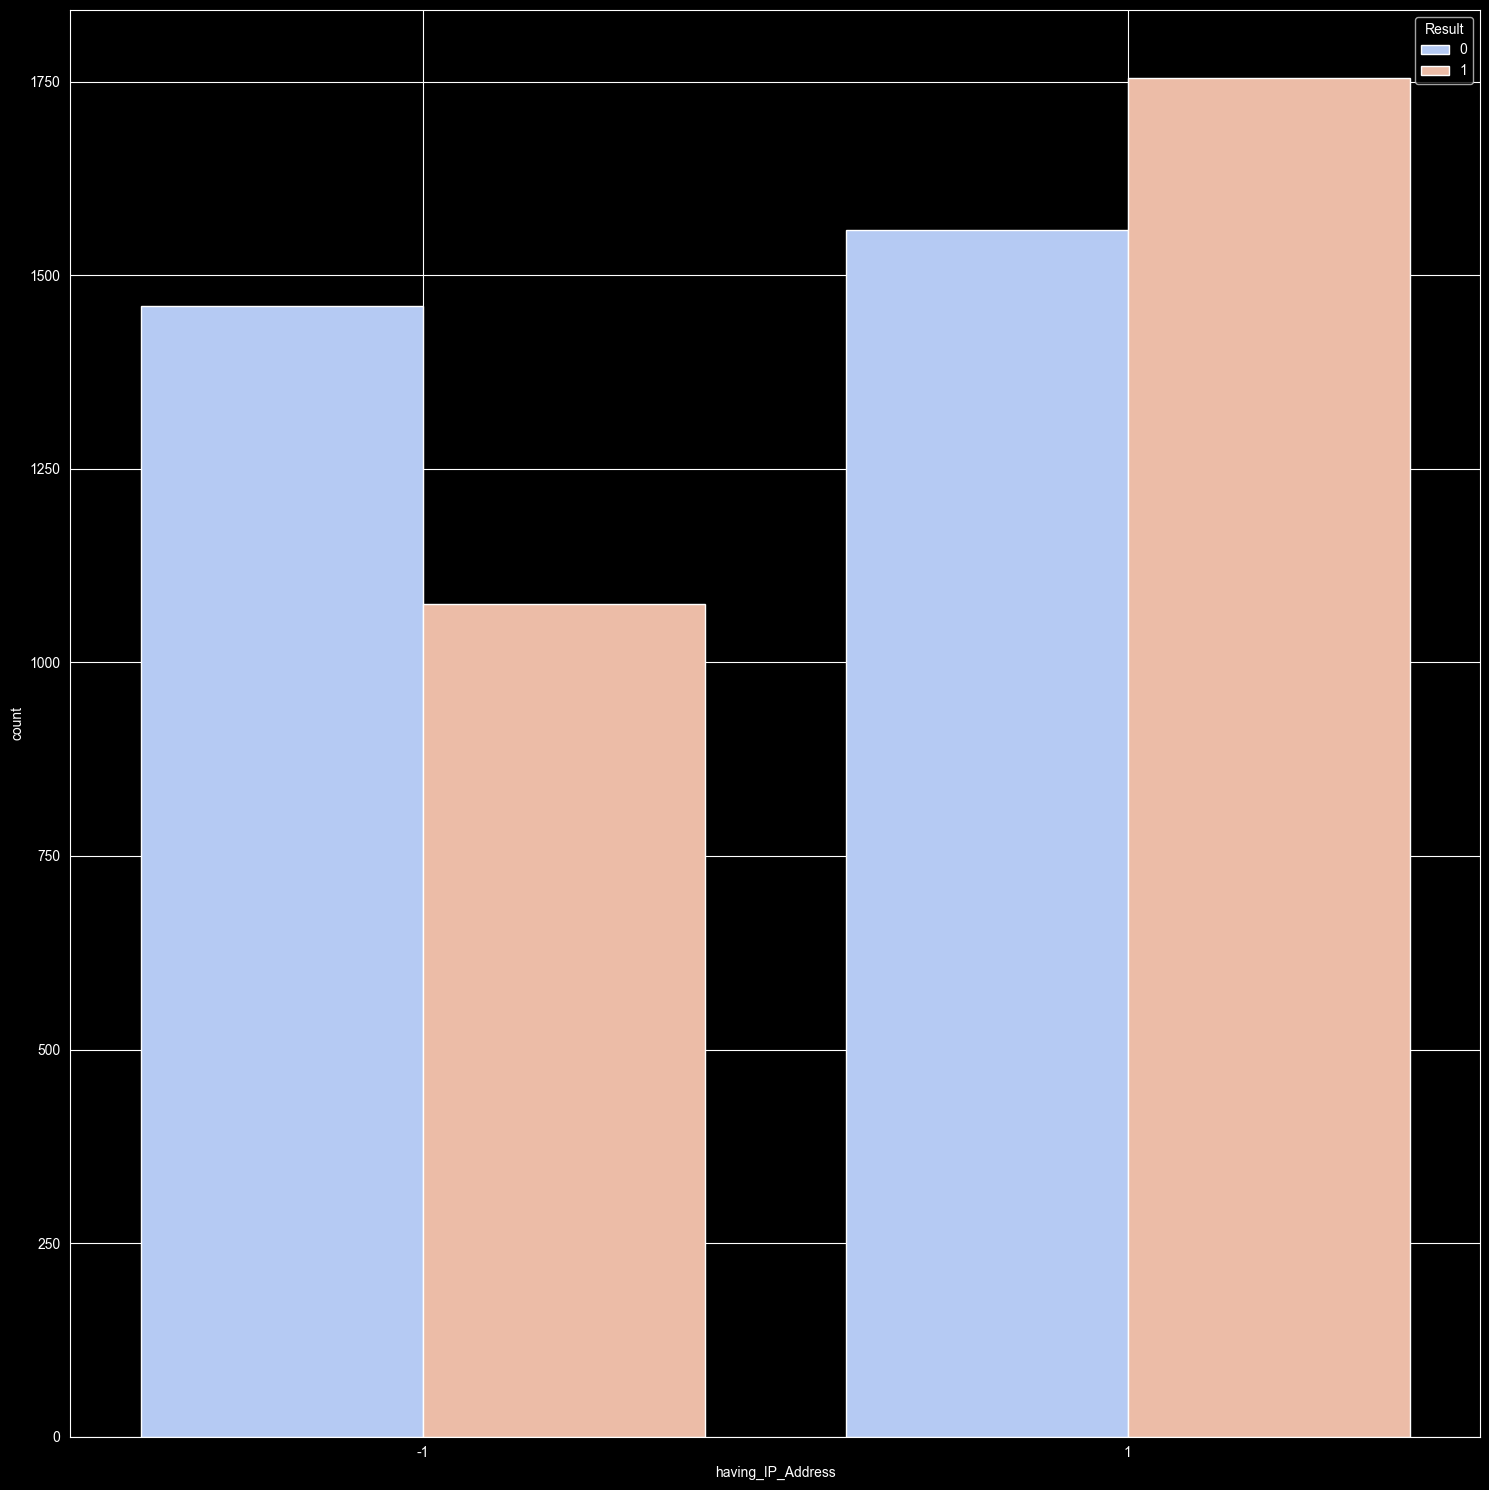

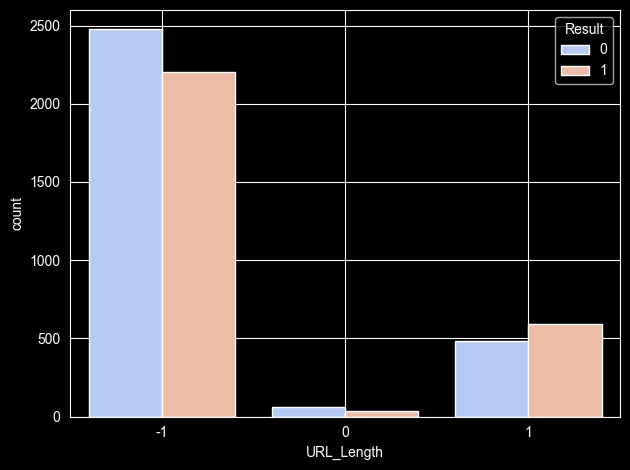

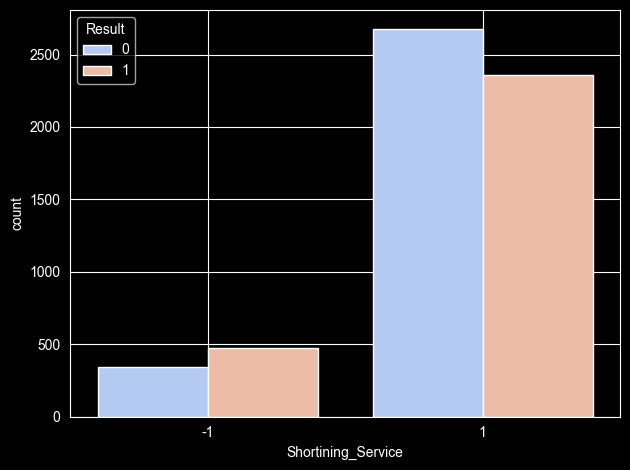

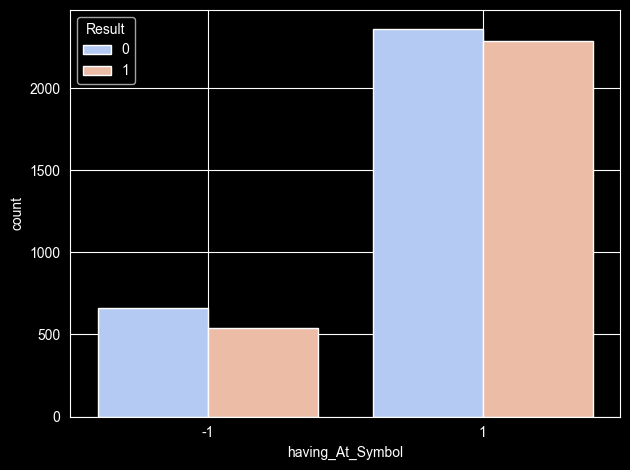

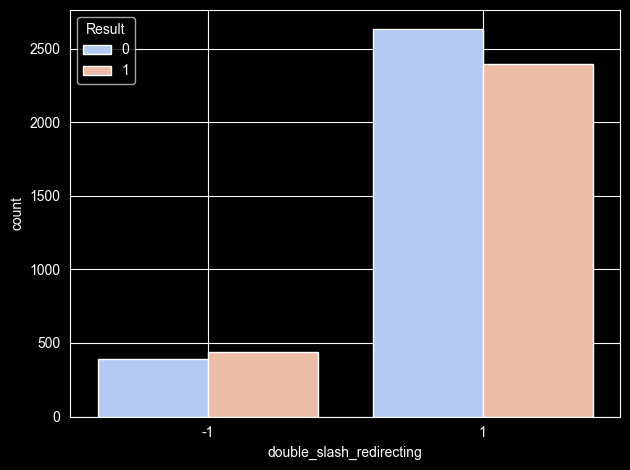

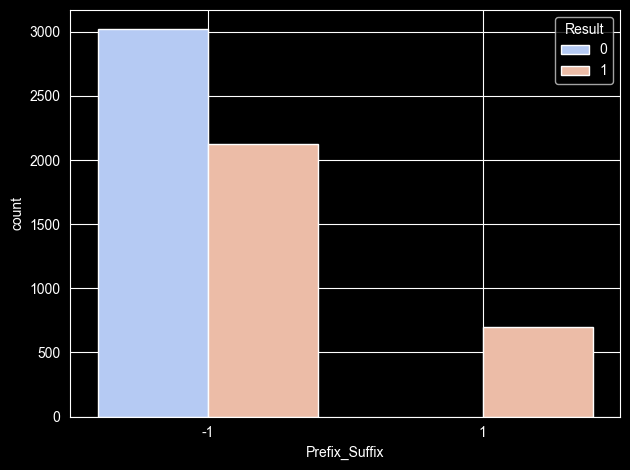

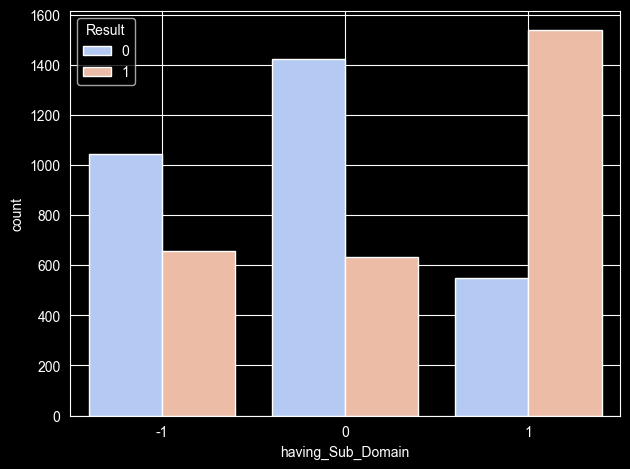

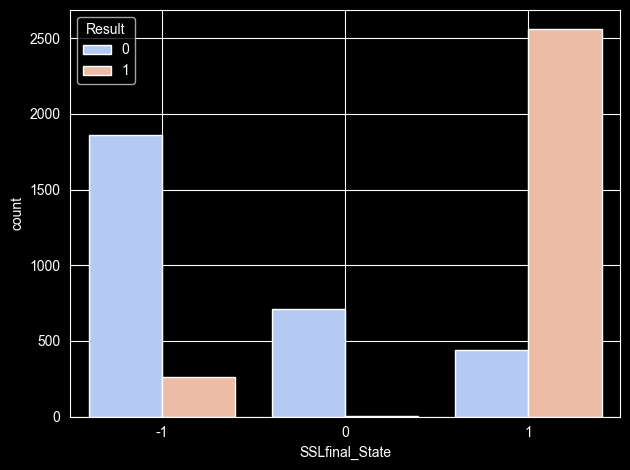

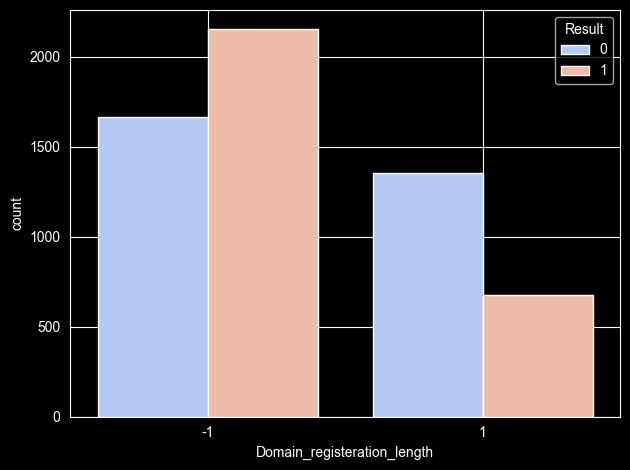

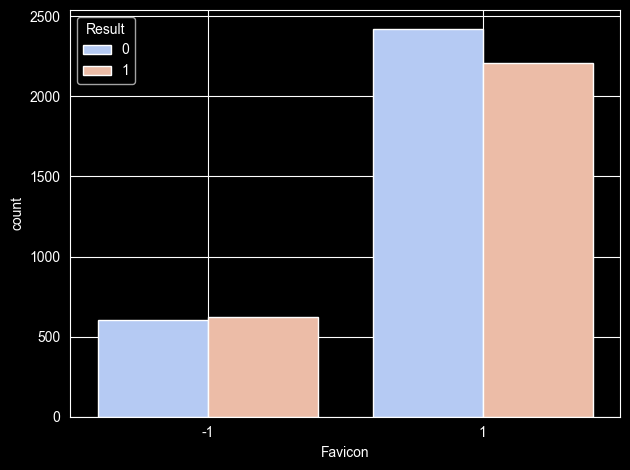

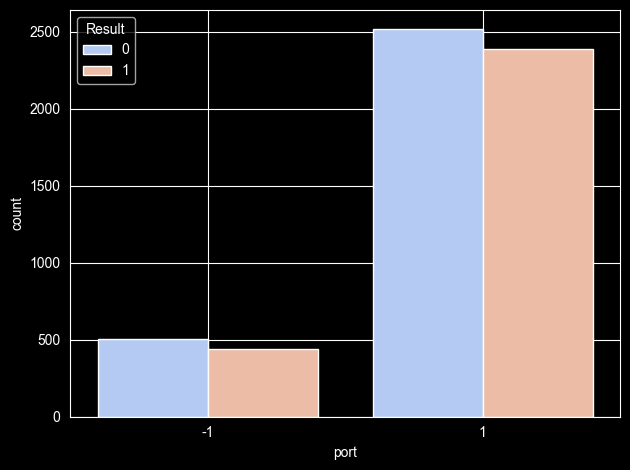

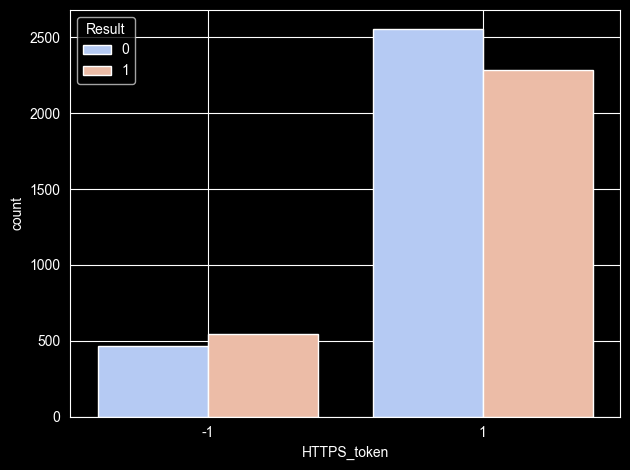

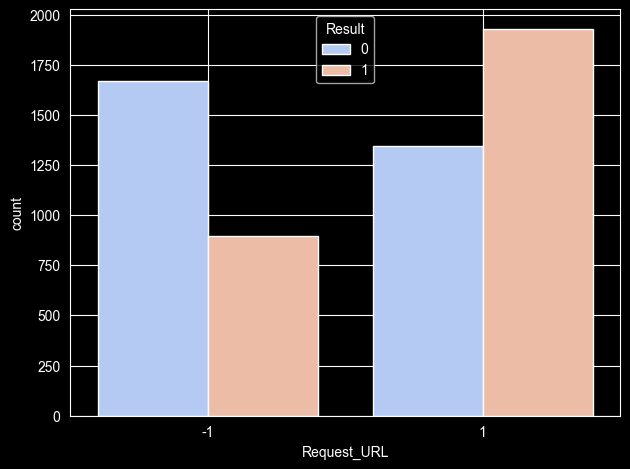

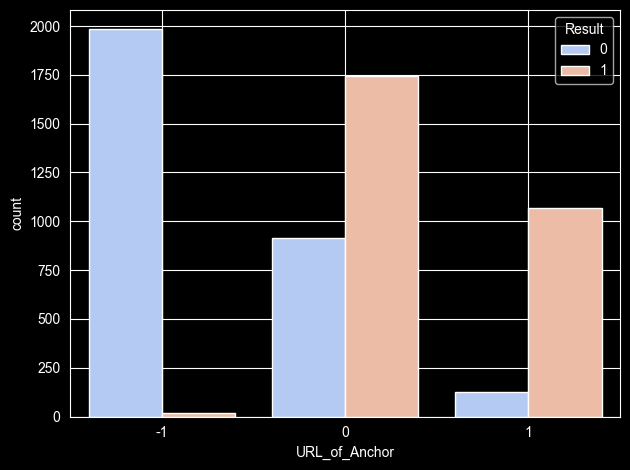

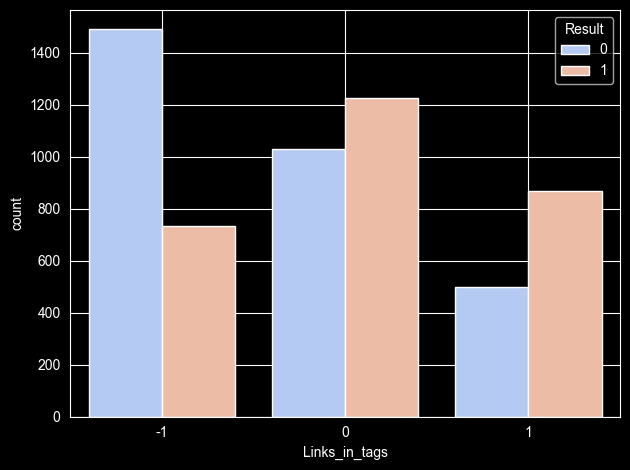

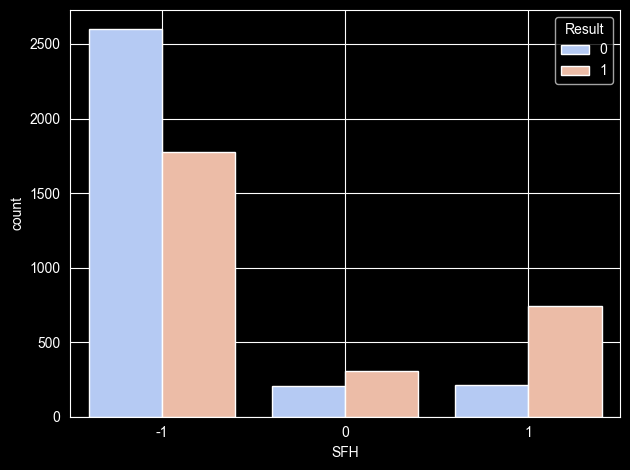

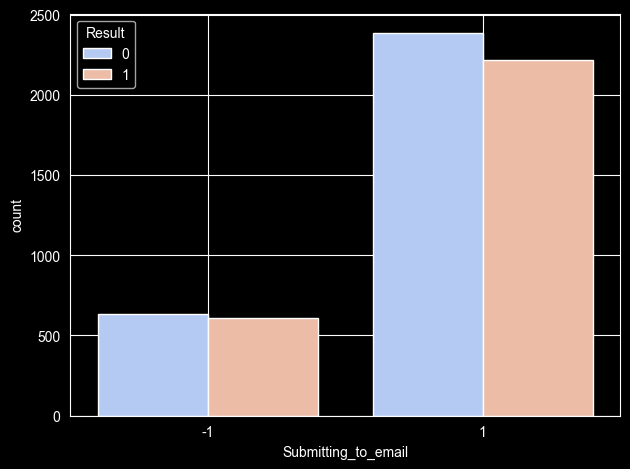

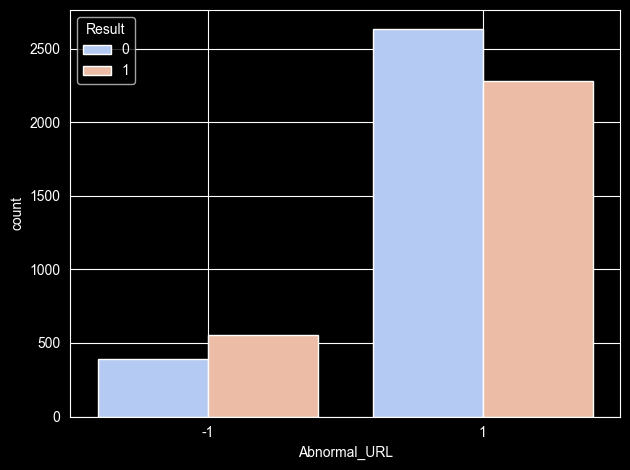

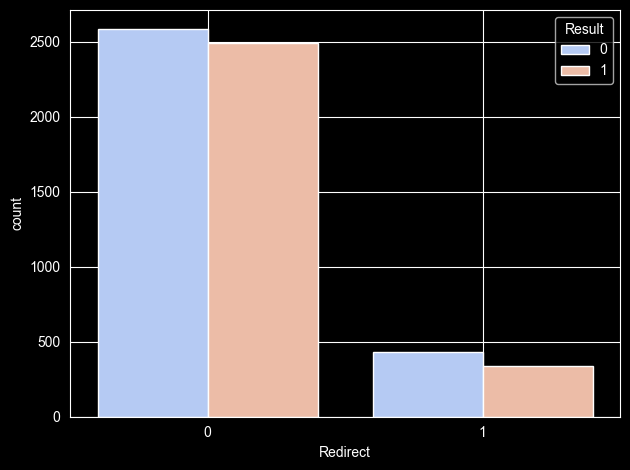

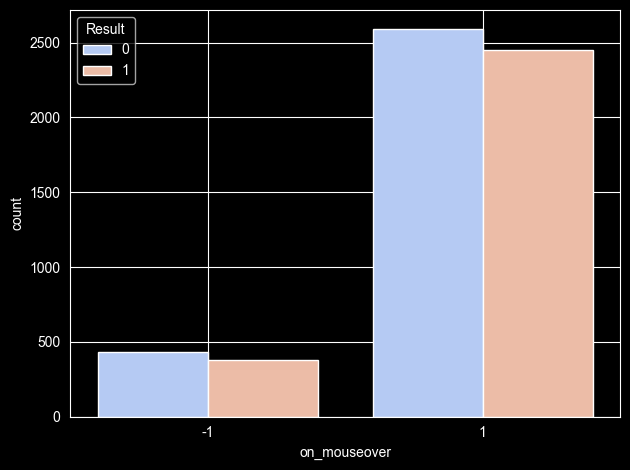

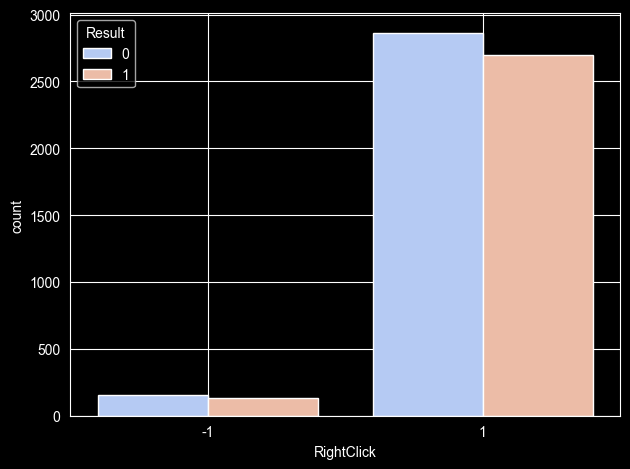

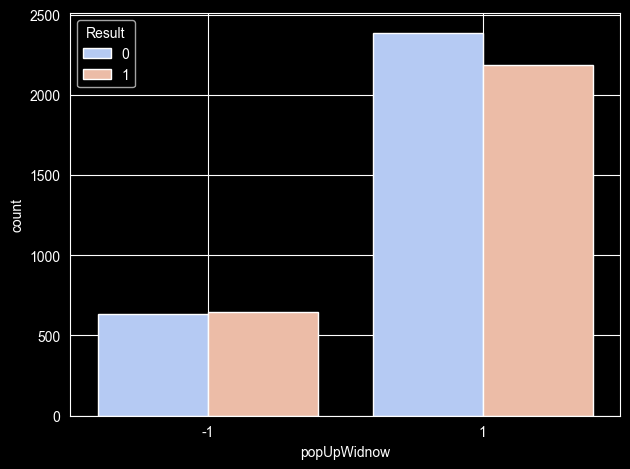

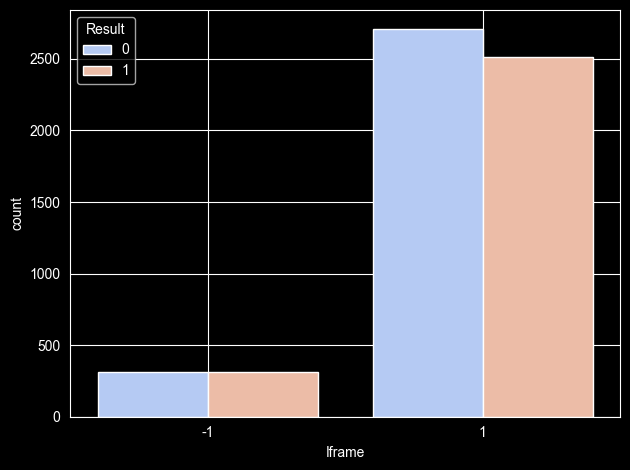

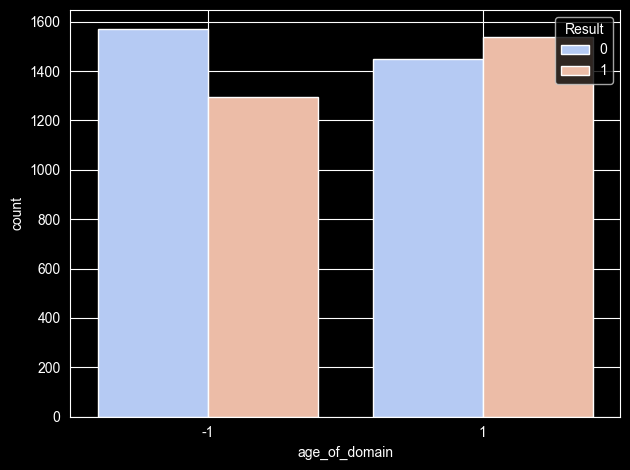

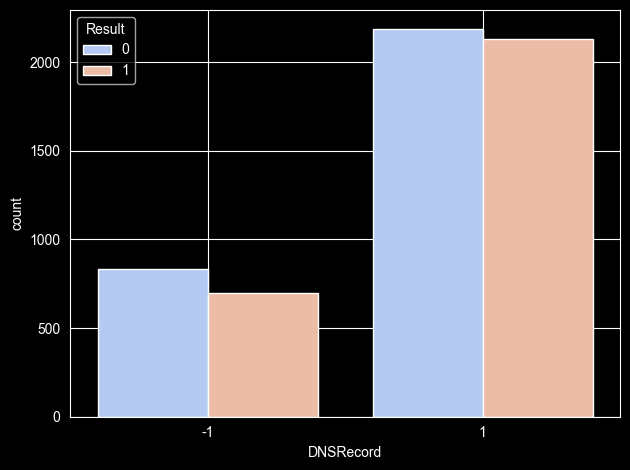

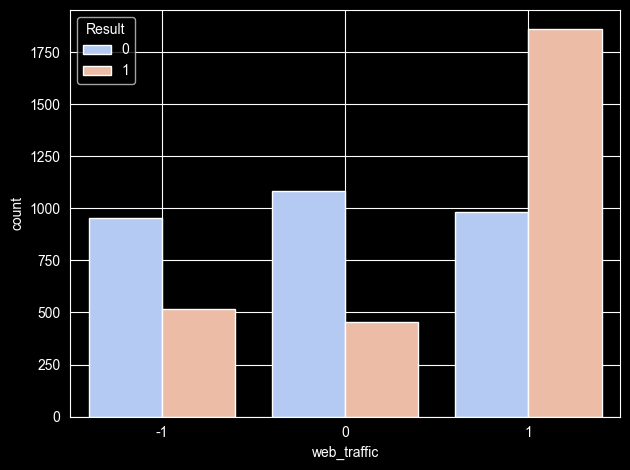

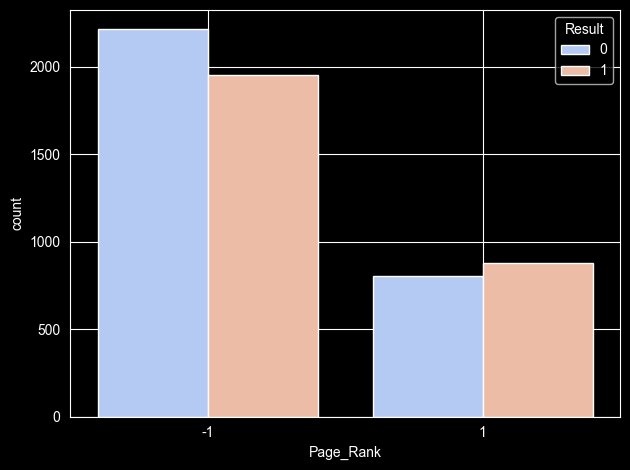

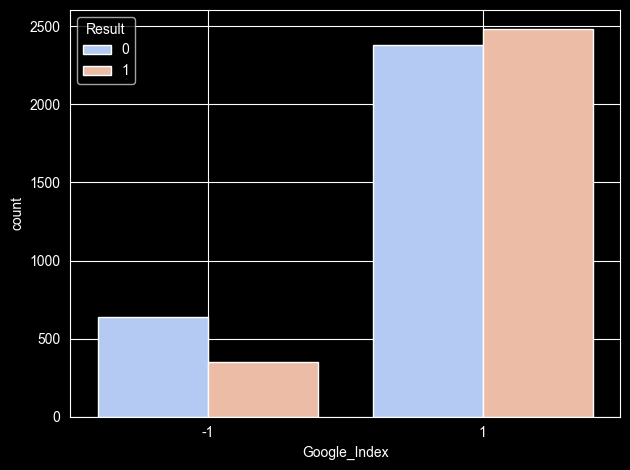

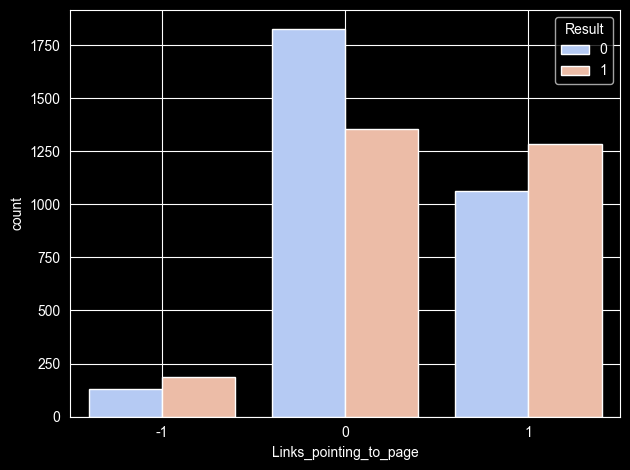

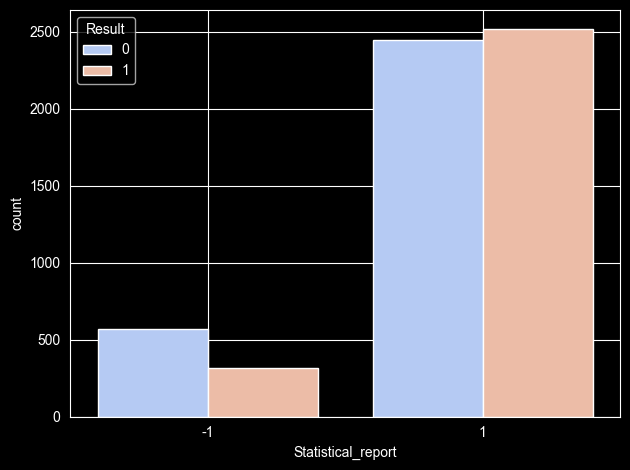

In [73]:
plt.figure(figsize=(15, 15))
for col in x.columns:
    sb.countplot(x=x[col], hue=y, palette="coolwarm")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

we could not figure out anything significant from the countplots
Let's see doing PCA

In [74]:
from sklearn.decomposition import PCA

In [75]:
pca = PCA(n_components=0.99)

pca.fit(x_train_transformed, y_train)

print(pca.explained_variance_ratio_)
print(pca.components_)

[0.17690546 0.12971988 0.08213253 0.05251654 0.04931727 0.04040222
 0.03755045 0.03665841 0.03407602 0.03229804 0.03223863 0.02950458
 0.02868468 0.02790738 0.0260432  0.02244912 0.02147969 0.02015782
 0.01529719 0.01497379 0.01436768 0.01357432 0.0122119  0.01056679
 0.01021283 0.00882476 0.00770257 0.0056695 ]
[[ 9.24460723e-02 -2.70389731e-02  1.46768395e-01  2.29557046e-01
   1.46361072e-01 -3.13763644e-02 -1.46821501e-02 -1.26257612e-02
   3.90886127e-02  3.68356446e-01  3.63613643e-01  1.45526174e-01
  -1.29231766e-02  1.20144676e-02 -8.79622619e-02  1.06497929e-02
   3.30430408e-01  1.58245913e-01 -7.92320503e-02  3.34970977e-01
   2.54171927e-01  3.67941518e-01  3.30743271e-01 -1.50899327e-02
   1.07540638e-01 -3.10505626e-02  1.42659851e-02  1.70561635e-02
  -9.15079344e-02  1.05949179e-01]
 [ 1.62034511e-01 -7.30620404e-02  4.27176837e-01 -1.65753539e-02
   4.24545610e-01 -4.96700116e-02 -3.45000281e-02 -4.44663940e-02
   3.99813407e-02 -1.53529242e-01 -1.67247651e-01  3.9219

here 2 columns are discarded by PCA. Ok now let us split the data and store in mongo-db